#  This is a shared notebook for Project I - Group 3

## Data Cleaning

In [1]:
#Dependencies
import os
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
csvDir = os.path.join("Resources")
col_list = ["month_of_death","day_of_week_of_death","current_data_year",
                              "manner_of_death","358_cause_recode","sex","detail_age"]
masterDf = pd.DataFrame()
files = os.listdir(csvDir)
for file in files:
    if file.endswith(".csv"):
        curCsv = os.path.join(csvDir,file)
        with open(curCsv) as file:
            x = pd.read_csv(file, usecols=col_list)
            masterDf = pd.concat([masterDf,x],axis=0)

In [3]:
#Filter to only deaths related to cars
car_death_data = masterDf[(masterDf["358_cause_recode"] >=385) & (masterDf["358_cause_recode"] <=398)]
car_death_data.head()

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
207,1,M,32,7,2005,1.0,396
208,1,M,75,5,2005,1.0,387
220,1,M,68,7,2005,1.0,396
234,2,M,21,1,2005,1.0,396
235,2,M,24,1,2005,1.0,396


In [4]:
#Clean up the dataframe so that it is readable
month_dict = {
      1:"January",
      2:"February",
      3:"March",
      4:"April",
      5:"May",
      6:"June",
      7:"July",
      8:"August",
      9:"September",
      10:"October",
      11:"November",
      12:"December"}
      
day_of_week_dict = {
      1:"Sunday",
      2:"Monday",
      3:"Tuesday",
      4:"Wednesday",
      5:"Thursday",
      6:"Friday",
      7:"Saturday",
      9:"Unknown"}

manner_of_death_dict = {
      1:"Accident",
      2:"Suicide",
      3:"Homicide",
      4:"Pending investigation",
      5:"Could not determine",
      6:"Self-Inflicted",
      7:"Natural"}
#       "Blank":"Not specified"}

cause_recode_dict = {
      385:" 385- Motor vehicle accidents",
      386:" 386- Pedestrian involved in collision with motor vehicle",
      387:" 387- Pedalcyclist involved in collision with motor vehicle",
      388:" 388- Motorcyclist involved in any accident except collision with railway train",
      389:" 389- Motor vehicle accident involving collision with railway train",
      390:" 390- Motorcyclist involved in collision with railway train",
      391:" 391- Other motor vehicle accident involving collision with railway train",
      392:" 392- Occupant of motor vehicle involved in collision with other (non- motorized) road vehicle, streetcar, animal or pedestrian",
      393:" 393- Occupant of car, pickup truck or van involved in collision with other motor vehicle",
      394:" 394- Occupant of heavy transport vehicle or bus involved in collision with other motor vehicle",
      395:" 395- Occupant of motor vehicle involved in non-collision accident",
      396:" 396- Occupant of special-use motor vehicle involved in any accident",
      397:" 397- Other and unspecified motor vehicle accidents",
      398:" 398- Streetcar accidents"}
    

clean_df = car_death_data.replace({"month_of_death": month_dict, 
                        "day_of_week_of_death": day_of_week_dict,
                        "manner_of_death": manner_of_death_dict,
                        "358_cause_recode": cause_recode_dict})

clean_df

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
207,January,M,32,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...
208,January,M,75,Thursday,2005,Accident,387- Pedalcyclist involved in collision with ...
220,January,M,68,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...
234,February,M,21,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...
235,February,M,24,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...
...,...,...,...,...,...,...,...
2717184,December,M,67,Friday,2015,Accident,397- Other and unspecified motor vehicle acci...
2717278,December,F,77,Thursday,2015,Accident,397- Other and unspecified motor vehicle acci...
2717674,December,M,73,Wednesday,2015,Accident,397- Other and unspecified motor vehicle acci...
2717998,December,M,70,Thursday,2015,Accident,395- Occupant of motor vehicle involved in no...


In [5]:
#  check quality of data
#  list all unique values in each columns

colNames = list(clean_df.columns)
for col in colNames:
    print(col)
    print(f"{clean_df[col].unique()}")
    print("----------")

month_of_death
['January' 'February' 'March' 'April' 'June' 'May' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
sex
['M' 'F']
----------
detail_age
[ 32  75  68  21  24  25  44  49  40  11  14  64  57  18   9  54  31  42
  27  43  58  46  33  22  13  61  56  16  53  30  23  26  20  83  34  38
  85  15   1  47  65  72  52  17  28  12  19  48  45  50  66  81  41  62
  59  69  39  37  63  78  80  35  73  36  90 999  82  55  51   2  60  70
  29  91  79   7  84  76   8   5  77  89  74   4  10  88  86   6   3  71
  67  92 101  94  87  93  97  96 102 100  99  95  98 106 104 103 107]
----------
day_of_week_of_death
['Saturday' 'Thursday' 'Sunday' 'Tuesday' 'Wednesday' 'Monday' 'Friday'
 'Unknown']
----------
current_data_year
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
----------
manner_of_death
['Accident' 'Natural' 'Could not determine' 'Homicide' nan
 'Pending investigation' 'Suicide']
----------
358_cause_recode
[' 396- Occupant of special-use motor 

In [6]:
#  Clean up
#  Remove not logical data 
# ie: age of 999, day of week : Unknown, manner_of_death nan, need filter by Accident
finalDf = clean_df[clean_df["detail_age"] != 999]
finalDf = finalDf[finalDf["manner_of_death"] == "Accident"]
finalDf =  finalDf[finalDf["day_of_week_of_death"] != "Unknown"]
finalDf.head()

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
207,January,M,32,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...
208,January,M,75,Thursday,2005,Accident,387- Pedalcyclist involved in collision with ...
220,January,M,68,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...
234,February,M,21,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...
235,February,M,24,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...


In [7]:
## Amanda's code starts here

Questions to answer:<br /> 
What month are motor vehicle accidents most likely to happen?<br /> 
Is there any statistical significance to how the deaths are distributed across months?"


In [8]:
#Inverse dictionary: this part will make it easier to display months in the graph in the right order

inv_dict = {v: k for k, v in month_dict.items()}
inv_dict

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

### Find the total number of motor vehicle deaths that occured in each month

In [9]:
# Make a copy of the final dataframe, only including the columns we need
cause_of_death_df = finalDf[['month_of_death', '358_cause_recode']].copy()

#Find out how many years of data we have
total_years = finalDf['current_data_year'].nunique()

#Use numbers instead of month name to allow for sorting
cause_of_death_df = cause_of_death_df.replace({"month_of_death": inv_dict})

#Create a new dataframe of vehicle deaths, grouped by month
grouped_df = cause_of_death_df.groupby(['month_of_death']).count()
grouped_df.reset_index(drop=False, inplace=True)
grouped_df["358_cause_recode"] = pd.to_numeric(grouped_df["358_cause_recode"])

### Create a bar graph that displays avg number of vehicle deaths per month 

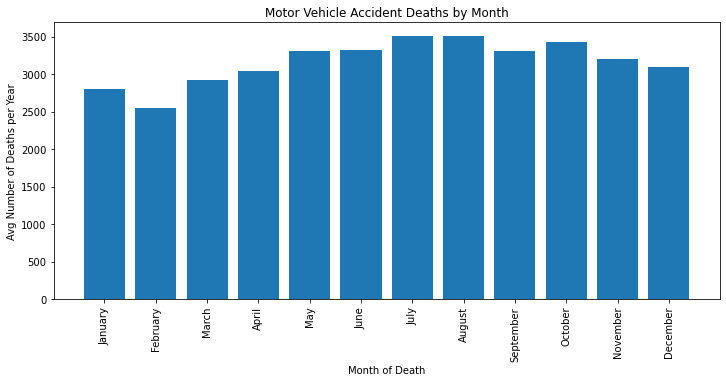

In [10]:
x_axis = np.arange(1,13,1)
y_axis = grouped_df['358_cause_recode'] / total_years

tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,5))

plt.bar(x_axis, y_axis)

plt.xticks(tick_locations, ["January", "February", "March", "April", "May", "June", "July", "August",\
                            "September", "October", "November", "December"], rotation='vertical')

plt.tight_layout()

# Add labels & title
plt.title("Motor Vehicle Accident Deaths by Month")
plt.xlabel("Month of Death")
plt.ylabel("Avg Number of Deaths per Year")

plt.show()

### ANOVA Test 1: determine whether the number of deaths per month is statistically significant

In [11]:
#Add the current data year in to the cause_of_death_df
cause_of_death_df = finalDf[['month_of_death', 'current_data_year', '358_cause_recode']].copy()

grouped_df = cause_of_death_df.groupby(['current_data_year', 'month_of_death']).count()
grouped_df.reset_index(drop=False, inplace=True)

In [12]:
# Run ANOVA test to compare the month with the most deaths (August) to the most with the least deaths (February)
February = grouped_df[grouped_df["month_of_death"] == 'February']["358_cause_recode"]
August = grouped_df[grouped_df["month_of_death"] == 'August']["358_cause_recode"]

stats.f_oneway(February, August)

F_onewayResult(statistic=42.425595897501985, pvalue=2.385867742925349e-06)

#### Null hypothesis: there is no significant difference in the number of deaths that happen in February vs August. 
##### Anova test results: We can reject the null hypothesis because the p-value is less than 0.05. More motor vehicle deaths happen in August than in February.

### ANOVA Test 2: determine if there's a significant difference between the number of deaths that happen in the winter vs the summer

In [13]:
# Create a new dataframe segmented by seasons

seasons_dict = {
      'January':"Winter",
      'February':"Winter",
      'December':"Winter",
      'June':"Summer",
      'July':"Summer",
      'August':"Summer",
      'September':"Fall",
      'October':"Fall",
      'November':"Fall",
      'March':"Spring",
      'April':"Spring",
      'May':"Spring"}

finalDf["Season"] = finalDf['month_of_death']
seasons_df = finalDf.replace({"Season": seasons_dict})
seasons_df = seasons_df[['current_data_year', 'Season', '358_cause_recode']]
seasons_df = seasons_df.groupby(['current_data_year', 'Season']).count()
seasons_df.reset_index(drop=False, inplace=True)

seasons_df.head()

,current_data_year,Season,358_cause_recode
0,2005,Fall,11770
1,2005,Spring,10670
2,2005,Summer,12069
3,2005,Winter,9858
4,2006,Fall,11471


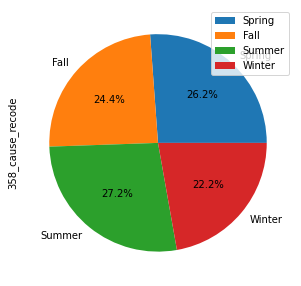

In [14]:
#Create a pie chart that shows deaths by season
finalDf["Season"] = finalDf['month_of_death']
seasons_df2 = finalDf.replace({"Season": seasons_dict})
seasons_df2 = seasons_df2[['Season', '358_cause_recode']]
seasons_df2 = seasons_df2.groupby(['Season']).count()
seasons_df2.reset_index(drop=False, inplace=True)
my_labels = 'Spring','Fall','Summer','Winter'

seasons_df2
seasons_df2.plot.pie(y='358_cause_recode', figsize=(5, 5), labels=my_labels, autopct='%1.1f%%')

In [15]:
# ANOVA test by Season
Winter = seasons_df[seasons_df["Season"] == 'Winter']["358_cause_recode"]
Summer = seasons_df[seasons_df["Season"] == 'Summer']["358_cause_recode"]

stats.f_oneway(Winter, Summer)

F_onewayResult(statistic=18.781165691792996, pvalue=0.00032243751192492423)

#### Null hypothesis: there is no significant difference in the number of deaths that happen in Winter vs Summer 
##### Anova test results: We can reject the null hypothesis because the p-value is less than 0.05. More motor vehicle deaths happen in Summer than Winter.

In [16]:
## Amanda's code ends here

## Analysis

12
